# Figure 3

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
from PIL import Image

sys.path.append('./')
sys.path.append('../..') 
from consensus_variables import * 
from load_data_f3 import *
from plot_f3 import *

In [18]:
# paths
data_dir = "../../data"

mutrate_file = os.path.join(deepcsa_run_dir, "mutrate/all_mutrates.tsv")

omega_dir = os.path.join(deepcsa_run_dir, "omegagloballoc")

regressions_mutrate_dir = regressions_omega_dir = os.path.join(data_dir, "regressions/",
                        "20250522_FINALPAPER45DONORS_mutrate_omega_ForzeInterc_SelectedGenesPerMetric")
figures_dir = "figs/"

## Load general data

In [19]:
clinvars_df = pd.read_csv(clinvars_file, sep = "\t")
clinvars_df

,SAMPLE_ID,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,SMOKING_STATUS,HISTORY_OF_SMOKING,CURRENT_SMOKER,SMOKING_PACK_YEAR,...,NOTCH2_depth,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth
0,P19_0047_BDO_01,P19_0047,UF-20-25,46,M,29.9,former,yes,no,NaN,...,6866.809023,4604.716364,12537.872222,8061.174839,10219.111423,7411.275842,10154.727518,8533.763889,1217.225989,7219.964358
1,P19_0009_BTR_01,P19_0009,A150,56,F,32.8,current,yes,yes,NaN,...,3582.336286,20081.660000,22902.629630,3906.232083,9616.333567,3643.054758,19295.271583,2809.628472,2877.779661,8327.585211
2,P19_0008_BDO_01,P19_0008,A149,72,M,28.3,former,yes,no,NaN,...,5380.276086,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383
3,P19_0001_BTR_01,P19_0001,A133,24,M,30.1,never,no,no,0.0,...,6541.577498,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962
4,P19_0041_BDO_01,P19_0041,20-47,59,F,52.7,never,no,no,0.0,...,4657.111403,2385.021818,5453.885185,5192.524296,4991.056762,5017.462665,4003.279676,5407.927083,1000.299435,4480.454219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,P19_0051_BTR_01,P19_0051,NaN,79,M,35.0,former,yes,no,NaN,...,9103.178799,3423.169091,6183.216667,11250.679166,8946.863350,8309.846559,4375.084532,10197.385417,2199.564972,7265.051577
75,P19_0052_BDO_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,8950.867700,6724.989091,9597.907407,10454.000666,10035.801682,8557.754319,6531.122302,9640.461806,5426.531073,9069.061127
76,P19_0052_BTR_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,4868.489067,4098.137273,4993.168519,5390.901930,5905.169587,4274.387116,4220.028777,4882.638889,2633.853107,4992.780493
77,P19_0053_BDO_01,P19_0053,NaN,72,M,19.5,former,yes,no,NaN,...,9015.418904,3214.100000,5951.287037,11580.210783,8484.175193,8225.657394,3842.708633,10380.493056,2003.457627,7172.570262


In [20]:
mutrate_df = pd.read_csv(mutrate_file, sep = "\t")
# keep only SNVs
mutrate_df = mutrate_df.loc[mutrate_df["MUTTYPES"] == "SNV"][["SAMPLE_ID", "GENE", "REGIONS", "MUTTYPES", "MUTRATE_MB"]]
mutrate_df = mutrate_df.merge(clinvars_df, on = "SAMPLE_ID", how = "inner")
print(len(mutrate_df["SAMPLE_ID"].unique()))
mutrate_df["GENE"] = mutrate_df["GENE"].replace({"ALL_GENES": "total"}) # change for the merging with the regressions df
mutrate_df

79


,SAMPLE_ID,GENE,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,NOTCH2_depth,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,3877.301273,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,3877.301273,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,3877.301273,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,3877.301273,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,3877.301273,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,P19_0002_BDO_01,TMEM123,all,SNV,0.000000,P19_0002,A135,73,F,27.8,...,3795.115970,3929.377273,6685.933333,4337.512758,4897.518570,4504.394436,4819.200540,4912.277778,581.960452,4218.769783
13584,P19_0002_BDO_01,TMEM123-DT,all,SNV,0.000000,P19_0002,A135,73,F,27.8,...,3795.115970,3929.377273,6685.933333,4337.512758,4897.518570,4504.394436,4819.200540,4912.277778,581.960452,4218.769783
13585,P19_0002_BDO_01,TP53,all,SNV,1.301805,P19_0002,A135,73,F,27.8,...,3795.115970,3929.377273,6685.933333,4337.512758,4897.518570,4504.394436,4819.200540,4912.277778,581.960452,4218.769783
13586,P19_0002_BDO_01,TRIP10,all,SNV,0.000000,P19_0002,A135,73,F,27.8,...,3795.115970,3929.377273,6685.933333,4337.512758,4897.518570,4504.394436,4819.200540,4912.277778,581.960452,4218.769783


In [21]:
omega_df = load_omega_res(omega_dir)
omega_df = omega_df.merge(clinvars_df, left_on = "sample", right_on = "SAMPLE_ID", how = "inner")
print(len(omega_df["SAMPLE_ID"].unique()))
omega_df

79


,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,NOTCH2_depth,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth
0,KDM6A--29_ENST00000611820_ENSE00003540925,P19_0001_BDO_01,missense,1,35.962891,0.022359,2.049137,159.154419,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
1,KDM6A--29_ENST00000611820_ENSE00003540925,P19_0001_BDO_01,nonsynonymous_splice,1,30.750049,0.026654,1.752074,135.992358,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
2,NOTCH2--28_ENST00000256646_ENSE00000913348,P19_0001_BDO_01,missense,1,12.400098,0.073872,0.707245,54.894604,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
3,NOTCH2--28_ENST00000256646_ENSE00000913348,P19_0001_BDO_01,nonsynonymous_splice,1,11.379688,0.081447,0.648435,50.345752,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
4,KMT2D--12_ENST00000301067_ENSE00001272923,P19_0001_BDO_01,missense,2,4.228174,0.100054,0.701014,13.125269,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57280,KDM6A--6_ENST00000611820_ENSE00003612563,P19_0053_BTR_01,essential_splice,1,350.150000,0.001835,19.840145,1577.372290,P19_0053_BTR_01,P19_0053,...,7771.737753,2919.826364,4680.294444,10192.409141,7458.359495,7332.741435,3187.251799,9158.923611,1394.514124,6253.477335
57281,KDM6A--6_ENST00000611820_ENSE00003612563,P19_0053_BTR_01,truncating,1,85.550000,0.008552,4.864176,382.116772,P19_0053_BTR_01,P19_0053,...,7771.737753,2919.826364,4680.294444,10192.409141,7458.359495,7332.741435,3187.251799,9158.923611,1394.514124,6253.477335
57282,KDM6A--6_ENST00000611820_ENSE00003612563,P19_0053_BTR_01,essential_splice_plus,1,272.237500,0.002421,15.376693,1243.154248,P19_0053_BTR_01,P19_0053,...,7771.737753,2919.826364,4680.294444,10192.409141,7458.359495,7332.741435,3187.251799,9158.923611,1394.514124,6253.477335
57283,KDM6A--6_ENST00000611820_ENSE00003612563,P19_0053_BTR_01,truncating_plus,1,79.849951,0.009241,4.534621,356.344092,P19_0053_BTR_01,P19_0053,...,7771.737753,2919.826364,4680.294444,10192.409141,7458.359495,7332.741435,3187.251799,9158.923611,1394.514124,6253.477335


## Fig3A

In [22]:
gene_order = gene_order_sexbias

In [23]:
## SNV EXCESS ##

# filter omega for fig3a
omega_excess_df = omega_df.loc[
                            (omega_df["sample"].isin(all_sample_names_dirty)) &
                            (omega_df["gene"].isin(gene_order)) &
                            (omega_df["impact"].isin(["missense", "truncating"]))].copy()

# calculate excess of SNVs
omega_excess_df["excess"] = (omega_excess_df["dnds"] - 1) / omega_excess_df["dnds"]

# set negative values to zero
omega_excess_df["excess"] = omega_excess_df["excess"].apply(lambda x : max(0, x))

# convert the proportional excess into absolute mutation counts
omega_excess_df["excess_muts"] = (omega_excess_df["excess"] * omega_excess_df["mutations"]).apply(np.floor)

# sum missense and truncating excess of mutations
omega_excess_df = omega_excess_df.groupby(by = ['gene', 'sample'])['excess_muts'].sum().astype(int).reset_index()

# sum mutation excess belonging to the same donor
omega_excess_df['CLEAN_SAMPLE_ID'] = omega_excess_df['sample'].map(old2new_sample_names)
omega_excess_df['DONOR'] = omega_excess_df['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])
omega_excess_df = omega_excess_df.groupby(by = ['DONOR', 'gene'])['excess_muts'].sum().reset_index()

# rename for plot
omega_excess_df = omega_excess_df.rename({"excess_muts": "DRIVERS", "gene": "GENE"}, axis = 1)
omega_excess_df["GENE"] = omega_excess_df["GENE"] + "_SNV"

omega_excess_df

,DONOR,GENE,DRIVERS
0,01,ARID1A_SNV,35
1,01,CDKN1A_SNV,2
2,01,CREBBP_SNV,1
3,01,EP300_SNV,5
4,01,KDM6A_SNV,25
...,...,...,...
561,53,NOTCH2_SNV,57
562,53,RB1_SNV,5
563,53,RBM10_SNV,87
564,53,STAG2_SNV,0


In [24]:
## PROTEIN-AFFECTING INDELS ##

# filter mutrate table to only keep PA indels
indels_df = pd.read_csv(mutrate_file, sep = "\t")
indels_df = indels_df.loc[(indels_df["MUTTYPES"] == "DELETION-INSERTION") &
                        (indels_df["REGIONS"] == "protein_affecting") &
                        (indels_df["GENE"].isin(gene_order)) &
                        (indels_df["SAMPLE_ID"].isin(all_sample_names_dirty))][["SAMPLE_ID", "GENE", "N_MUTS"]]

indels_df['CLEAN_SAMPLE_ID'] = indels_df['SAMPLE_ID'].map(old2new_sample_names)
indels_df['DONOR'] = indels_df['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])

# sum indels belonging to the same donor
indels_df = indels_df.groupby(by = ['DONOR', 'GENE'])['N_MUTS'].sum().reset_index()
indels_df = indels_df.rename({"N_MUTS": "DRIVERS"}, axis = 1)

# rename for plot
indels_df["GENE"] = indels_df["GENE"] + "_indel"

indels_df

,DONOR,GENE,DRIVERS
0,01,ARID1A_indel,28.0
1,01,CDKN1A_indel,13.0
2,01,CREBBP_indel,7.0
3,01,EP300_indel,4.0
4,01,FOXQ1_indel,0.0
...,...,...,...
580,53,NOTCH2_indel,13.0
581,53,RB1_indel,3.0
582,53,RBM10_indel,35.0
583,53,STAG2_indel,2.0


In [25]:
# concat the two tables and pivot
excessnvs_indels_df = pd.concat([omega_excess_df, indels_df])

excessnvs_indels_df = excessnvs_indels_df.pivot(
    columns = 'DONOR', index = 'GENE', values = 'DRIVERS').fillna(0).astype(int)
excessnvs_indels_df

DONOR,01,02,03,04,05,06,07,08,09,11,...,42,43,45,46,47,48,50,51,52,53
GENE,,,,,,,,,,,,,,,,,,,,,
ARID1A_SNV,35,90,11,83,13,0,39,81,22,81,...,30,0,26,32,63,13,134,261,1,62
ARID1A_indel,28,64,12,102,18,4,36,95,9,84,...,38,6,26,28,45,22,144,264,2,67
CDKN1A_SNV,2,0,1,27,9,0,0,5,8,3,...,37,1,7,24,7,4,6,1,0,1
CDKN1A_indel,13,5,8,110,30,0,4,49,4,12,...,109,6,20,88,40,1,19,1,3,12
CREBBP_SNV,1,48,31,12,9,21,7,61,143,22,...,55,5,19,26,2,22,42,39,22,21
CREBBP_indel,7,19,13,11,2,6,8,23,46,15,...,29,0,4,14,3,9,7,9,4,4
EP300_SNV,5,89,48,34,22,12,21,91,79,26,...,83,12,10,36,8,39,48,62,43,48
EP300_indel,4,35,12,12,10,11,15,18,17,13,...,23,7,1,16,5,14,28,23,11,35
FOXQ1_SNV,0,6,4,17,0,0,2,0,0,2,...,116,0,1,33,1,0,27,5,0,6


In [26]:
# edit gene names for plot
gene_order_edit = []
for gene in gene_order:
    gene_order_edit.append(f"{gene}_SNV")
    gene_order_edit.append(f"{gene}_indel")

gene_order_edit

['RBM10_SNV',
 'RBM10_indel',
 'CDKN1A_SNV',
 'CDKN1A_indel',
 'ARID1A_SNV',
 'ARID1A_indel',
 'STAG2_SNV',
 'STAG2_indel',
 'KDM6A_SNV',
 'KDM6A_indel',
 'KMT2D_SNV',
 'KMT2D_indel',
 'TP53_SNV',
 'TP53_indel',
 'CREBBP_SNV',
 'CREBBP_indel',
 'EP300_SNV',
 'EP300_indel',
 'NOTCH2_SNV',
 'NOTCH2_indel',
 'KMT2C_SNV',
 'KMT2C_indel',
 'RB1_SNV',
 'RB1_indel',
 'FOXQ1_SNV',
 'FOXQ1_indel']

In [27]:
# keep donors that have two samples for plot
donors_2samples = clinvars_df.groupby("SUBJECT_ID").size().to_frame(name = "nsamples")
donors_2samples = donors_2samples.loc[donors_2samples["nsamples"] > 1].reset_index()
donors_2samples = donors_2samples["SUBJECT_ID"].tolist()
len(donors_2samples)

34

/home/fcalvet/projects/bladder_paper/normal_bladder_paper/main/Fig3/plot_f3.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


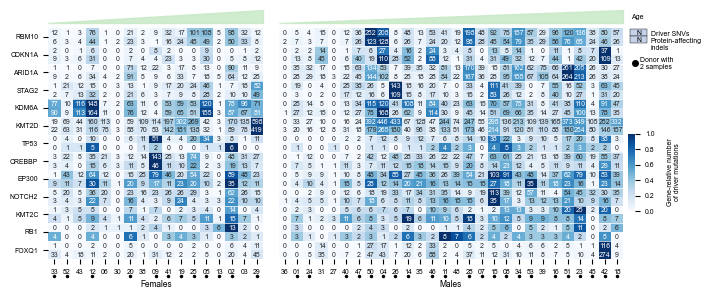

In [28]:
heatmap_config = {"h1_subset": females_age_ordered,
                "h2_subset": males_age_ordered,
                "duplicated_samples": [d.split("_")[1][2:] for d in donors_2samples],
                "h1_title": "Females",
                "h2_title": "Males",
                "title_fontsize": plots_general_config["xylabel_fontsize"],
                "genes_order": gene_order_edit,
                "width_ratios": [1.25, 2],
                "cmap": "Blues", 
                "cmap_label": "\nGene-relative number\nof driver mutations",
                "cmap_label_fontsize": plots_general_config["annots_fontsize"],
                "cmap_ticks_fontsize": plots_general_config["annots_fontsize"],
                "cmap_orient": "vertical",
                "cmap_loc": [0.88, 0.3, 0.01, 0.25], # [left, bottom, width, height]
                "rows2separate": [i for i in range(2, len(gene_order_edit), 2)],
                "annot_fontsize": plots_general_config["annots_fontsize"],
                "xyticks_fontsize": plots_general_config["xyticks_fontsize"],
                "figsize": (7.192, 3.1)}

plot_double_heatmap(excessnvs_indels_df, heatmap_config, os.path.join(figures_dir, "fig3a.pdf"))

## Fig3B

In [29]:
# keep protein-affecting and non-protein-affecting mutation rates for the total of the sample
regions = ["protein_affecting", "non_protein_affecting"]
mutrate_PA_NPA_allgenes_df = mutrate_df.loc[(mutrate_df["REGIONS"].isin(regions)) &
                                            (mutrate_df["GENE"] == "total")]
mutrate_PA_NPA_allgenes_df["REGIONS"] = mutrate_PA_NPA_allgenes_df["REGIONS"].replace({"protein_affecting": "Protein affecting",
                                                                                       "non_protein_affecting": "Non-protein affecting"})
mutrate_PA_NPA_allgenes_df = mutrate_PA_NPA_allgenes_df[["AGE", "REGIONS", "MUTRATE_MB"]].reset_index(drop = True)
mutrate_PA_NPA_allgenes_df.columns = ["AGE", "response", "mutrate"]
mutrate_PA_NPA_allgenes_df

/tmp/ipykernel_2994380/1560419681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutrate_PA_NPA_allgenes_df["REGIONS"] = mutrate_PA_NPA_allgenes_df["REGIONS"].replace({"protein_affecting": "Protein affecting",


,AGE,response,mutrate
0,86,Protein affecting,2.247730
1,41,Non-protein affecting,0.279052
2,56,Protein affecting,1.420436
3,66,Protein affecting,1.728347
4,79,Protein affecting,1.513643
...,...,...,...
153,46,Protein affecting,1.444551
154,50,Protein affecting,1.645062
155,86,Non-protein affecting,0.508076
156,80,Protein affecting,2.318899


In [ ]:
# load regression results and make predictions to plot: mutrate vs age
regr_mutrate_PA_age_df = load_lmem_pred(clinvar = "age_decades", 
                                        res_dir = regressions_mutrate_dir,
                                        metric = "mutrate.proteinaffecting",
                                        obsdata_df = mutrate_df[["SAMPLE_ID", "GENE", "AGE"]].drop_duplicates())

regr_mutrate_PA_allgenes_age_df = regr_mutrate_PA_age_df.loc[regr_mutrate_PA_age_df["gene"] == "total"].reset_index(drop = True)
regr_mutrate_PA_allgenes_age_df["response"] = "Protein affecting"

regr_mutrate_NPA_age_df = load_lmem_pred(clinvar = "age_decades", 
                                        res_dir = regressions_mutrate_dir,
                                        metric = "mutrate.nonproteinaffecting",
                                        obsdata_df = mutrate_df[["SAMPLE_ID", "GENE", "AGE"]].drop_duplicates())
regr_mutrate_NPA_allgenes_age_df = regr_mutrate_NPA_age_df.loc[regr_mutrate_NPA_age_df["gene"] == "total"].reset_index(drop = True)
regr_mutrate_NPA_allgenes_age_df["response"] = "Non-protein affecting"


regr_mutrate_PA_NPA_allgenes_age_df = pd.concat([regr_mutrate_PA_allgenes_age_df, regr_mutrate_NPA_allgenes_age_df]).reset_index(drop = True) # 62 points because we have 31 different ages
regr_mutrate_PA_NPA_allgenes_age_df

MergeError: Passing 'suffixes' which cause duplicate columns {'age_decades_x'} is not allowed.

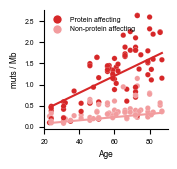

In [ ]:
plot_config = {}
plot_config["plot1"] = {}
plot_config["plot1"]["Protein affecting"] = plots_general_config["dot_colorabove_coeffplot"]
plot_config["plot1"]["Non-protein affecting"] = plots_general_config["dot_colorbelow_coeffplot"]
plot_config2 = {"title": "",
               "ylabel": "muts / Mb",
               "xlabel": "Age", 
               "figsize": (1.595, 1.543)}

regr_res_scatterplot(metric = "mutrate",
                     clinvar = "AGE",
                     data_df = mutrate_PA_NPA_allgenes_df, 
                     regrres_df = regr_mutrate_PA_NPA_allgenes_age_df,
                     plot_config = plot_config,
                     plot_config2 = plot_config2,
                     plots_general_config = plots_general_config,
                     save_file = os.path.join(figures_dir, "fig3b.pdf"),
                     add_legend = True)

## Fig3C

In [31]:
regr_mutrate_PA_age_df_simple = regr_mutrate_PA_age_df.drop(["age_decades", "predicted", "AGE"], axis = 1).drop_duplicates()
display(regr_mutrate_PA_age_df_simple)
regr_mutrate_NPA_age_df_simple = regr_mutrate_NPA_age_df.drop(["age_decades", "predicted", "AGE"], axis = 1).drop_duplicates()
regr_mutrate_NPA_age_df_simple

NameError: name 'regr_mutrate_PA_age_df' is not defined

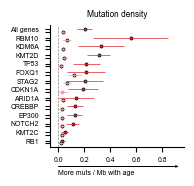

In [ ]:
significant_genes_PA = list(regr_mutrate_PA_age_df_simple.loc[(regr_mutrate_PA_age_df_simple["qval"] < 0.2) &
                        (regr_mutrate_PA_age_df_simple["gene"] != "total")].sort_values(
                        by = "coeff", ascending = True)["gene"].values)
significant_genes_PA.append("total")

plot_config = {"title": "Mutation density",
                "ylabels": ["", ""],
                "ylabels_gene_xcoord": -0.15,
                "arrow_xlim": 0.9,
                "arrow_yloc": -3,
                "arrow_head_width": 0.2,
                "arrow_head_length": 0.02,
                "effectsize_text": "More muts / Mb with age",
                "effectsize_text_loc": 0,
                "effectsize_text_yloc": -4,
                "sign_threshold": 0.2,
                "null_effect": 0, 
                }

regr_res_coeffplot(regrres_df = regr_mutrate_PA_age_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = significant_genes_PA, 
                   save_file = os.path.join(figures_dir, "fig3c_mutrate.pdf"),
                   regrres2compare_df = regr_mutrate_NPA_age_df_simple,
                   figsize = (1.725, 1.58))


In [ ]:
regr_omega_age_df_simple = load_lmem_pred(clinvar = "age_decades", 
                                    res_dir = regressions_omega_dir,
                                    metric = "omega",
                                    obsdata_df = None
                                    )
regr_omegatrunc_age_df_simple = regr_omega_age_df_simple.loc[~(regr_omega_age_df_simple["gene"].str.contains("missense"))]
regr_omegatrunc_age_df_simple["gene"] = regr_omegatrunc_age_df_simple["gene"].str.split('_').str[0]
display(regr_omegatrunc_age_df_simple)

regr_omegamiss_age_df_simple = regr_omega_age_df_simple.loc[~regr_omega_age_df_simple["gene"].str.contains("truncating")]
regr_omegamiss_age_df_simple["gene"] = regr_omegamiss_age_df_simple["gene"].str.split('_').str[0]
regr_omegamiss_age_df_simple

/home/rblanco/projects/normal_bladder_paper/main/Fig3/load_data_f3.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'age_decades_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/tmp/ipykernel_2987570/1880290883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omegatrunc_age_df_simple["gene"] = regr_omegatrunc_age_df_simple["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
1,ARID1A,0.0,1.258634,0.302185,-0.253211,2.770480
3,CDKN1A,0.0,1.360467,0.370850,-0.529234,3.250169
5,CREBBP,0.0,1.083177,0.037477,0.292594,1.873760
7,EP300,0.0,0.892777,0.015490,0.316955,1.468598
10,KDM6A,0.0,5.711787,0.002826,2.659318,8.764256
12,KMT2C,0.0,0.448818,0.002342,0.213327,0.684308
14,KMT2D,0.0,5.043649,0.000001,3.290780,6.796518
16,NOTCH2,0.0,0.875682,0.034303,0.246166,1.505197
19,RBM10,0.0,7.097071,0.001473,3.527779,10.666364
21,STAG2,0.0,1.462816,0.400551,-0.722815,3.648446


/tmp/ipykernel_2987570/1880290883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omegamiss_age_df_simple["gene"] = regr_omegamiss_age_df_simple["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0.0,0.165078,1.223040e-05,0.101733,0.228424
2,CDKN1A,0.0,0.249775,1.267880e-01,0.023598,0.475951
4,CREBBP,0.0,0.361675,4.806121e-04,0.194458,0.528891
6,EP300,0.0,0.255273,6.835189e-02,0.050440,0.460105
8,FOXQ1,0.0,0.367475,2.339955e-03,0.175797,0.559154
9,KDM6A,0.0,0.470116,3.528849e-04,0.257910,0.682322
11,KMT2C,0.0,0.126193,3.605667e-03,0.056530,0.195855
13,KMT2D,0.0,0.271197,1.631911e-08,0.188842,0.353552
15,NOTCH2,0.0,0.316635,3.605667e-03,0.142458,0.490812
17,RB1,0.0,0.222892,8.466508e-03,0.088732,0.357052


/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


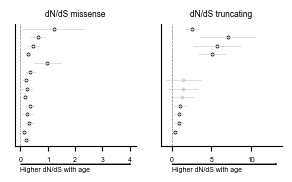

In [ ]:
plot_config = {"title": ["dN/dS missense", "dN/dS truncating"],
                "arrow_xlim": [4, 13.1],
                "arrow_yloc": [ -2.8, -2.8],
                "arrow_head_width": [ 0.15, 0.2],
                "arrow_head_length": [ 0.05, 0.16],
                "effectsize_text": [
                                    "Higher dN/dS with age",
                                    "Higher dN/dS with age"],
                "effectsize_text_loc": [-0.001, -0.001],
                "effectsize_text_yloc": [-3.6, -3.6],
                "sign_threshold": 0.2,
                "null_effect": 0, 
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.15}

regrres_df_dict = {
                   "dndsmiss": regr_omegamiss_age_df_simple.set_index("gene").reindex(significant_genes_PA).reset_index(),
                   "dndstrunc": regr_omegatrunc_age_df_simple.set_index("gene").reindex(significant_genes_PA).reset_index()}
regr_res_coeffplot_multi(regrres_df_dict = regrres_df_dict, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = significant_genes_PA, 
                   save_file = os.path.join(figures_dir, "fig3c_omega.pdf"),
                   regrres2compare_df = None,
                   figsize = (1.725*2, 1.58), remove_ylabels = True)

## Fig3D

In [ ]:
omegatrunc_sexgenes_df = omega_df.loc[(omega_df["impact"] == "truncating") & (omega_df["gene"].isin(["RBM10", "STAG2", "ARID1A", "CDKN1A"]))]
omegamiss_tp53_df = omega_df.loc[(omega_df["impact"] == "missense") & (omega_df["gene"] == "TP53")]
omega_sex_df = pd.concat([omegatrunc_sexgenes_df, omegamiss_tp53_df])
omega_sex_df

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,NOTCH2_depth,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth
123,RBM10,P19_0027_BTR_01,truncating,1,3.143750,0.336442,0.179082,13.970166,P19_0027_BTR_01,P19_0027,...,7125.171187,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816
137,STAG2,P19_0027_BTR_01,truncating,1,2.706641,0.393225,0.154181,11.991919,P19_0027_BTR_01,P19_0027,...,7125.171187,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816
334,STAG2,P19_0030_BTR_01,truncating,1,1.998438,0.535528,0.113888,8.884424,P19_0030_BTR_01,P19_0030,...,5879.162330,1954.958182,5193.600000,7599.328822,5985.858444,5268.269693,2620.681655,7048.027778,824.627119,5381.176768
553,STAG2,P19_0013_BTR_01,truncating,1,2.218359,0.482065,0.126456,9.833716,P19_0013_BTR_01,P19_0013,...,3721.398699,1620.313636,4136.350000,4643.565565,3830.855641,4031.235139,2247.937050,4765.697917,353.288136,3516.711544
693,ARID1A,P19_0001_BDO_01,truncating,5,17.893359,0.000011,6.348965,39.230029,P19_0001_BDO_01,P19_0001,...,6010.652090,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53017,TP53,P19_0046_BTR_01,missense,3,7.138281,0.010093,1.771187,18.603735,P19_0046_BTR_01,P19_0046,...,2289.982701,10447.936364,6623.488889,3074.234080,1752.609671,3565.864422,5184.281475,2404.562500,299.774011,3142.133921
53560,TP53,P19_0019_BTR_01,missense,2,2.009375,0.377275,0.334117,6.248267,P19_0019_BTR_01,P19_0019,...,4891.487268,1640.354545,4393.144444,5193.787442,4753.323756,4972.858565,3362.305755,5728.548611,799.197740,4274.435841
54338,TP53,P19_0008_BDO_01,missense,11,3.591406,0.000494,1.855788,6.192725,P19_0008_BDO_01,P19_0008,...,5380.276086,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383
55365,TP53,P19_0023_BTR_01,missense,11,3.865625,0.000263,1.998057,6.666528,P19_0023_BTR_01,P19_0023,...,7184.614448,1841.948182,6765.479630,7502.203461,6009.289418,7160.063836,4154.763489,7279.694444,1109.062147,5270.467559


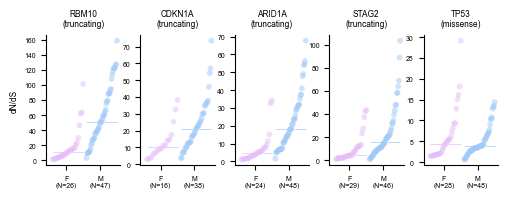

In [ ]:
genes_sex = {"RBM10": "RBM10\n(truncating)", 
             "CDKN1A": "CDKN1A\n(truncating)",
             "ARID1A": "ARID1A\n(truncating)",
             "STAG2": "STAG2\n(truncating)", 
             "TP53": "TP53\n(missense)"}
clinvar = "SEX"
metric = "dnds"
plot_config = {"ylabel": "dN/dS",
               "xlabel": "",
              "figsize": (8, 1.921),
              "grid_nrows": 17,
              "grid_ncols": 10*6,
              "titles": genes_sex,
              "dot_size": 8,
              "line_width": 0.5}

plot_sigmoids(os.path.join(figures_dir, "fig3e.pdf"),
              prepare_twin_plot_data(omega_sex_df, clinvar, genes_sex, clinvar2color[clinvar],metric).reset_index(drop = True),
              clinvar,
              list(genes_sex.keys()),
              clinvar2color[clinvar],
              plot_config,
              plots_general_config,
              mode='twin')

## Fig3E

In [ ]:
regr_mutrate_PA_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_mutrate_dir,
                                     metric = "mutrate.proteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_NPA_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_mutrate_dir,
                                     metric = "mutrate.nonproteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_PA_sex_df_simple

/home/rblanco/projects/normal_bladder_paper/main/Fig3/load_data_f3.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/home/rblanco/projects/normal_bladder_paper/main/Fig3/load_data_f3.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(


,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0.000000,0.448753,0.498155,-0.236430,1.133936
1,CDKN1A,0.000000,0.835508,0.072951,0.144283,1.526732
2,CREBBP,0.976967,-0.168354,0.622648,-0.555745,0.219038
3,EP300,0.932523,-0.020551,0.982375,-0.399983,0.358881
4,FOXQ1,0.000000,0.402302,0.679004,-0.476665,1.281268
5,KDM6A,2.110819,0.564588,0.504492,-0.448407,1.577582
6,KMT2C,0.367216,0.060497,0.698809,-0.114047,0.235041
7,KMT2D,1.624610,-0.101182,0.898163,-0.718046,0.515682
8,NOTCH2,0.754280,-0.008967,0.982375,-0.310617,0.292684
9,RB1,0.290693,-0.017912,0.930784,-0.147211,0.111387


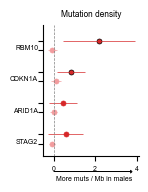

In [ ]:
sex_genes = ["STAG2", "ARID1A", "CDKN1A", "RBM10"]
plot_config = {"title": "Mutation density",
                "ylabels": ["", ""],
                "ylabels_gene_xcoord": -0.75,
                "arrow_xlim": 3.7,
                "arrow_yloc": -1.2,
                "arrow_head_width": 0.1,
                "arrow_head_length": 0.08,
                "effectsize_text": "More muts / Mb in males",
                "effectsize_text_loc": 0.1,
                "effectsize_text_yloc": -1.5,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.1}
plots_general_config["dot_size_coeffplot"] = 13
regr_res_coeffplot(regrres_df = regr_mutrate_PA_sex_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = sex_genes, 
                   save_file = os.path.join(figures_dir, "fig3f_mutrate.pdf"),
                   regrres2compare_df = regr_mutrate_NPA_sex_df_simple,
                   figsize = (1.231, 1.7))

/home/rblanco/projects/normal_bladder_paper/main/Fig3/load_data_f3.py:36: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/tmp/ipykernel_2987570/628141501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omega_sex_df_simple_trunc["gene"] = regr_omega_sex_df_simple_trunc["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
1,ARID1A,0.000000,19.034906,0.001070,9.764919,28.304893
3,CDKN1A,0.000000,17.319926,0.004281,7.589893,27.049959
5,CREBBP,7.324030,-3.417567,0.273191,-7.381500,0.546366
7,EP300,7.532798,-1.239926,0.751571,-4.292604,1.812752
10,KDM6A,38.847908,5.647685,0.797310,-11.377944,22.673315
12,KMT2C,3.774704,0.340882,0.845317,-1.069257,1.751021
14,KMT2D,26.052842,-6.527040,0.533140,-17.126778,4.072698
16,NOTCH2,7.044405,-1.306952,0.741049,-4.449421,1.835516
19,RBM10,0.000000,33.735190,0.009341,13.164492,54.305888
21,STAG2,0.000000,10.135967,0.305899,-2.155700,22.427635


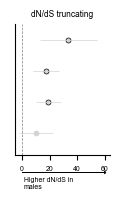

In [ ]:
regr_omega_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_omega_dir,
                                     metric = "omega",
                                     obsdata_df = None
                                    )
regr_omega_sex_df_simple_trunc = regr_omega_sex_df_simple.loc[(regr_omega_sex_df_simple["gene"].str.contains("truncating"))]
regr_omega_sex_df_simple_trunc["gene"] = regr_omega_sex_df_simple_trunc["gene"].str.split('_').str[0]
display(regr_omega_sex_df_simple_trunc)

sex_genes = ["STAG2", "ARID1A", "CDKN1A", "RBM10"]
plot_config = {"title": "dN/dS truncating",
                "ylabels_gene_xcoord": -0.65,
                "arrow_xlim": 60,
                "arrow_yloc": -1.25,
                "arrow_head_width": 0.1,
                "arrow_head_length": 1,
                "effectsize_text": "Higher dN/dS in\nmales",
                "effectsize_text_loc": 1,
                "effectsize_text_yloc": -1.75,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.1}
regr_res_coeffplot(regrres_df = regr_omega_sex_df_simple_trunc, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = sex_genes, 
                   save_file = os.path.join(figures_dir, "fig3f_omega_trunc.pdf"),
                   regrres2compare_df = None,
                   figsize = (1.231, 1.7), remove_ylabels = True, 
                   add_arrow = True)